Se importan las librerías necesarias para el funcionamiento del programa

In [1]:
import numpy as np
import cv2 as cv
from pathlib import Path
from tqdm import tqdm
import matplotlib.pyplot as plt
import sys

from ipywidgets import interactive, widgets, Layout

%matplotlib inline 
# se importa el modulo de vision
from pv_vision.transform_crop.solarmodule import MaskModule

Uso de la herramienta para recortar una imagen de módulo en celdas individuales usando el método de detección de contornos.



1. `img = cv.imread('/home/franklin/PVDefectDetect/EjemplosPV-vision/module_imgs/example_3.jpg', 0)`: Esta línea está utilizando la función `imread` de la biblioteca OpenCV (cv) para leer una imagen en escala de grises (el segundo argumento '0' indica esto) desde la ruta especificada.

2. `raw_module = MaskModule(img, 6, 12, 3) # 6 rows && 12 columns && 3 busbar`: Esta línea crea una instancia de la clase `MaskModule` con la imagen leída, especificando que la imagen ttiene 6 filas, 10 columnas y 3 barras de bus (busbar).

3. `plt.imshow(raw_module.image, 'gray')`: Finalmente, esta línea utiliza la función `imshow` de la biblioteca matplotlib (plt) para mostrar la imagen almacenada en la propiedad `image` de la instancia `raw_module`. La imagen se muestra en escala de grises, como se indica por el segundo argumento 'gray'.

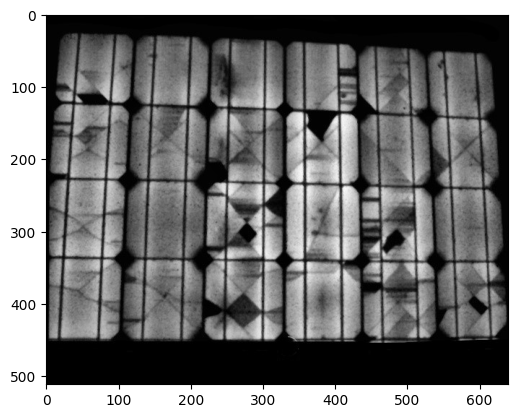

In [168]:
#img = cv.imread('/home/franklin/PVDefectDetect/Test_ImageJ/AVG_070A_8v.tif', 0)
#img = cv.imread('D:/Documentos/Universidad de Cuenca/Trabajo de Titulación/PVDefectDetect/Test_ImageJ/AVG_070A_8v.tif', 0)
#img = cv.imread('D:/Documentos/Universidad de Cuenca/Trabajo de Titulación/PVDefectDetect/ImagePreprocessing/Salidas/panel_260W/Imagenes_Promediadas/AVG_V44.5_I9.16_t_NoBG_CLAHE.jpg', 0)
#img = cv.imread('D:/Documentos/Universidad de Cuenca/Trabajo de Titulación/PVDefectDetect/ImagePreprocessing/Salidas/panel_260W/Imagenes_Promediadas/resize_IA.jpeg', 0)
img = cv.imread('D:/Documentos/Universidad de Cuenca/Trabajo de Titulación/Datasets_EL/Modulos/mono2_sup_edited2.jpg', 0)
save_path = 'D:/Documentos/Universidad de Cuenca/Trabajo de Titulación/Datasets_EL/CeldasIndividuales/Mono2_V40_I5_t28'
module_name = 'mono2sup'

raw_module = MaskModule(img, 4, 6, 2) # 5 rows && 3 columns && 3 busbar
#raw_module = MaskModule(img, 4, 16, 0) # 8 rows && 16 columns && 0 busbar
#raw_module = MaskModule(img, 12, 15, 0) # 8 rows && 16 columns && 0 busbar
plt.imshow(raw_module.image, 'gray')

In [169]:
## Carga la mascara de la imagen
## Se usa el deslizador para encontrar el umbral adecuado
def update_mask(thre):
    mask = raw_module.load_mask(thre=thre, output=True)
    plt.figure(figsize=(8, 6))
    #plt.imshow(mask, "gray")
    mask_array = np.array(raw_module.mask)
    plt.imshow(mask_array, 'gray')

thre = widgets.FloatSlider(value=0.28, min=0, max=1, step=0.02)
interactive(update_mask,
            thre=thre, description="Threshold")

interactive(children=(FloatSlider(value=0.28, description='thre', max=1.0, step=0.02), Output()), _dom_classes…

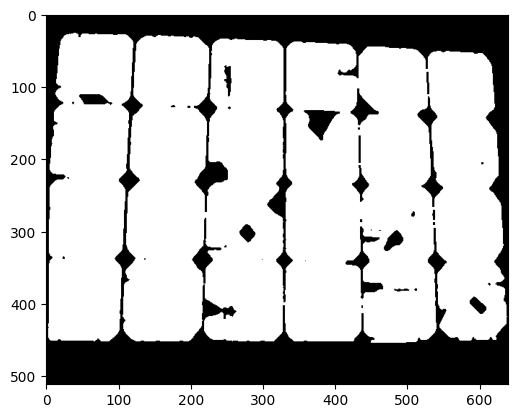

In [170]:
## Carga la mascara de la imagen con el umbral establecido
thre.value

# Se almacenara la mascara en una instancia raw_module
#plt.imshow(raw_module.mask, "gray")
mask_array = np.array(raw_module.mask)
plt.imshow(mask_array, 'gray')

In [171]:
# Detección de esquinas
# Se usa el deslizador para encontrar el mejor modo de detección de esquinas

def update_corner(mode):
    corners = raw_module.corner_detection_cont(output=True, mode=mode)
    x, y = zip(*corners)

    mask_array = np.array(raw_module.mask)
    plt.imshow(mask_array, 'gray')
    plt.scatter(x, y, c='r')

mode=widgets.IntSlider(value=0, min=0, max=4, step=1)
interactive(update_corner,
            mode=mode)

interactive(children=(IntSlider(value=0, description='mode', max=4), Output()), _dom_classes=('widget-interact…

Módulo transformado con éxito
Dimensiones del módulo:  (620, 930)


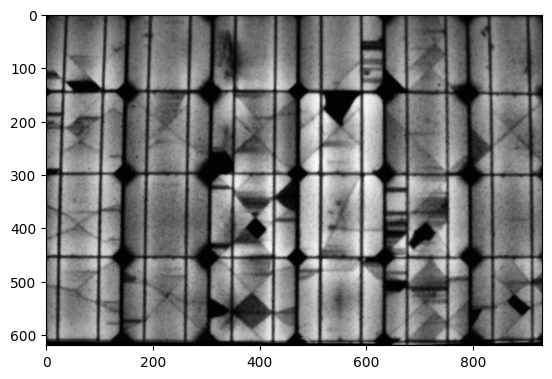

In [172]:
# Transformación de módulos

#img_transformed = raw_module.transform(cellsize=30, img_only=True) #30W
img_transformed = raw_module.transform(cellsize=155, img_only=True)  # 300 para resize IA #250
#img_transformed = raw_module.transform(width=600, height=300, cellsize=250, img_only=True)
#plt.imshow(img_transformed, 'gray')
if isinstance(img_transformed, np.ndarray):
    print("Módulo transformado con éxito")
    plt.imshow(img_transformed, 'gray')
# define el tamaño de ña celda en fucnión del ancho y alto
#cellsize = 600

# Imprime el tamaño del módulo
print("Dimensiones del módulo: ", img_transformed.shape)

In [173]:
# Ajuste de parámetros para bordes verticales

def update_edges(vl_split_size, vl_interval, vl_margin, vl_thre):
    fig = plt.figure(figsize=(8, 6))
    raw_module.plot_peaks(n_list=[2, 5, 6], split_size=vl_split_size,
                          interval=vl_interval, margin=vl_margin, thre=vl_thre, direction=0)

inner_edges_para = {
    'vl_interval': widgets.IntText(value=130),  # 239 para resize IA
    'vl_thre': widgets.FloatText(value=0.9),    # 0.9 para resize IA
    'vl_split_size': widgets.IntText(value=70), # 90 para resize IA, 30 Mono
    'vl_margin': widgets.IntText(value=140)     # 200 para resize IA, 120 Mono
}

interactive(update_edges, **inner_edges_para)

interactive(children=(IntText(value=70, description='vl_split_size'), IntText(value=130, description='vl_inter…

In [174]:
# Ajuste de parámetros para bordes horizontales

def update_edges(hl_split_size, hl_interval, hl_margin, hl_thre):
    fig = plt.figure(figsize=(8, 6))
    raw_module.plot_peaks(n_list=[3, 6, 9], split_size=hl_split_size,
                          interval=hl_interval, margin=hl_margin, thre=hl_thre, direction=1)

inner_edges_para = {
    'hl_interval': widgets.IntText(value=150),      # 200 para resize IA, 100 Mono
    'hl_thre': widgets.FloatText(value=0.9),        # 0.9 para resize IA, 1.0 Mono
    'hl_split_size': widgets.IntText(value=45),     # 45 para resize IA, 60 Mono
    'hl_margin': widgets.IntText(value=100)         # 100 para resize IA
}

interactive(update_edges, **inner_edges_para)

interactive(children=(IntText(value=45, description='hl_split_size'), IntText(value=150, description='hl_inter…

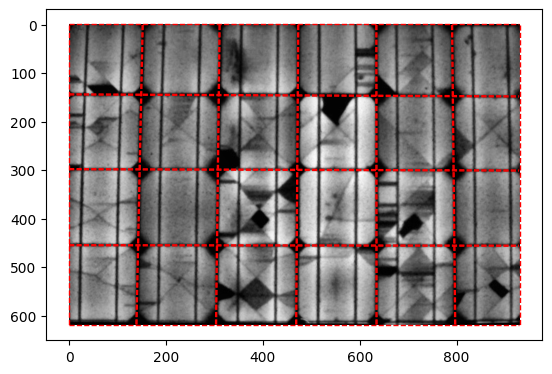

In [175]:
# Recorte de celdas
single_cells = raw_module.crop_cell(cellsize=155, plot=True, savepath=save_path, module_name=module_name)

Dimensiones de la celda:  (155, 155)


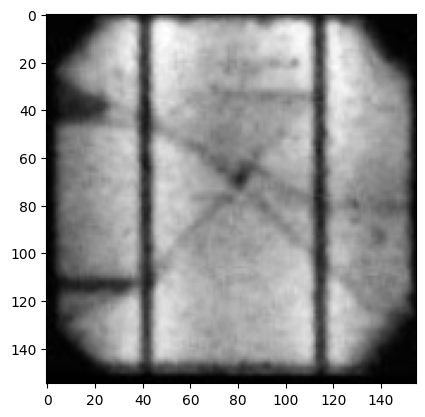

In [177]:
# Presentación de una única celda

plt.imshow(single_cells[19], 'gray')

# Imprime el tamaño de la celda
print("Dimensiones de la celda: ", single_cells[18].shape)

In [25]:
## Guardar las celdas en un directorio
path = 'D:/Documentos/Universidad de Cuenca/Trabajo de Titulación/PVDefectDetect/ImagePreprocessing/Salidas/panel_260W/Celdas_recortadas_NoBG_CLAHE'
Path(path).mkdir(parents=True, exist_ok=True)

for i, cell in enumerate(single_cells):
    cv.imwrite(f'{path}/cell_{i}.jpg', cell)

Dimensiones de la celda redimensionada:  (310, 310)


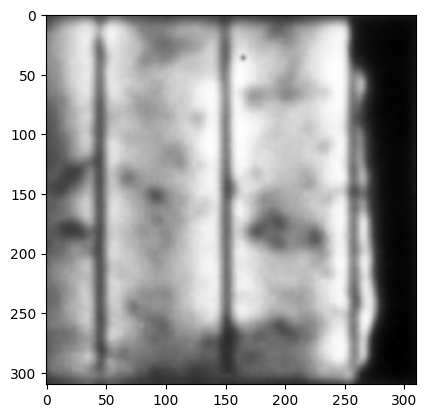

In [26]:
# Redimensionar las celdas al doble de su tamaño

def resize_cell(cell, factor):
    return cv.resize(cell, (cell.shape[1]*factor, cell.shape[0]*factor))

single_cells_resized = [resize_cell(cell, 2) for cell in single_cells]

path_resize = 'D:/Documentos/Universidad de Cuenca/Trabajo de Titulación/PVDefectDetect/ImagePreprocessing/Salidas/panel_260W/Celdas_recortadas_NoBG_CLAHE_resize'
Path(path).mkdir(parents=True, exist_ok=True)

for i, cell in enumerate(single_cells_resized):
    cv.imwrite(f'{path_resize}/cell_{i}.jpg', cell)

# Presentación de una única celda redimensionada

plt.imshow(single_cells_resized[18], 'gray')
print("Dimensiones de la celda redimensionada: ", single_cells_resized[18].shape)


In [ ]:
# Redimensión de imagen empleando Tensor Flow
import tensorflow as tf
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as img

def reescalar_imagen(imagen, ancho, alto):
    imagen = tf.image.resize(imagen, [ancho, alto])
    return imagen
path_resize_tf = 'D:/Documentos/Universidad de Cuenca/Trabajo de Titulación/PVDefectDetect/ImagePreprocessing/Salidas/panel_260W/Celdas_recortadas_tf'
Path(path_resize_tf).mkdir(parents=True, exist_ok=True)

path_original = 'D:/Documentos/Universidad de Cuenca/Trabajo de Titulación/PVDefectDetect/ImagePreprocessing/Salidas/panel_260W/Celdas_recortadas'
pathImagen = path_original + '/cell_18.jpg'

# Convertir la imagen a PNG para poder ser procesada por Tensor Flow
imagen = Image.open(pathImagen)
imagen_png = imagen.save(path_resize_tf + '/cell_18.png')

# Cargar la imagen
imagen1 = img.imread(path_resize_tf + '/cell_18.png')
plt.imshow(imagen1, cmap='gray')

